In [1]:
pip install scikit-optimize # terminal command; have to restart kernel after installation!


The following command must be run outside of the IPython shell:

    $ pip install scikit-optimize # terminal command

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [6]:
import numpy as np
from skopt import gp_minimize

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [8]:
from skopt import BayesSearchCV
# updates beliefs about where is best to 'randomly' search in grid-space!!
from skopt.space import Integer, Real

In [10]:
data = fetch_california_housing()
X = data['data']
y = data['target']
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
gbr = GradientBoostingRegressor()
search_space = {'n_estimators': Integer(50, 500), 
               'learning_rate': Real(1E-3, 1, prior='uniform'),
               'subsample': Real(1E-3, 1, prior='uniform'),
               'max_depth': Integer(1, 100),
               'min_samples_leaf': Integer(1, 100)}

bayes_search = BayesSearchCV(gbr, search_space, cv=3 , n_jobs=-1, verbose=1, n_iter=10, random_state=0)
# similar syntax!

In [13]:
bayes_search.fit(X_train, y_train)
# should be slower at the start due to uniform prior, until influenced more by the 'data'
# 3 mins

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   29.6s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.8s finished


BayesSearchCV(cv=3, error_score='raise',
              estimator=GradientBoostingRegressor(alpha=0.9,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='ls', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=...
              se

In [14]:
bayes_search.best_params_

OrderedDict([('learning_rate', 0.09296244240831063),
             ('max_depth', 90),
             ('min_samples_leaf', 80),
             ('n_estimators', 470),
             ('subsample', 0.4491499556331464)])

In [15]:
bayes_search.cv_results_

defaultdict(list,
            {'split0_test_score': [0.7828670370731062,
              0.7970951972990217,
              0.6985647816174341,
              0.8240284005306244,
              0.7967303318747108,
              0.2159072376913017,
              -3.1970984703439553,
              0.7009576508563212,
              0.8275617702966395,
              0.12507737939325791],
             'split1_test_score': [0.7751533949458744,
              0.793051590841477,
              0.7095974319474081,
              0.8278273417499752,
              0.7937889827160596,
              0.22557539077217814,
              -3.550705979563885,
              0.6825974216136572,
              0.8304023848062076,
              0.1608436161692245],
             'split2_test_score': [0.7786476828133466,
              0.7964690572623523,
              0.7049727960894905,
              0.8252021497849207,
              0.794326031324523,
              0.2230696559834926,
              -3.649099342449886

In [16]:
bayes_search.cv_results_.keys()

dict_keys(['split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_min_samples_leaf', 'param_n_estimators', 'param_subsample', 'params'])

In [17]:
bayes_search.cv_results_['mean_fit_time']

[21.270194212595623,
 3.1000912189483643,
 1.152216116587321,
 16.54651165008545,
 1.251527468363444,
 3.5707441171010337,
 1.567191521326701,
 0.1450176239013672,
 9.702341636021933,
 1.8479932149251301]

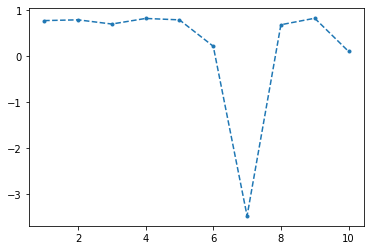

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), bayes_search.cv_results_['mean_test_score'], '--.')
plt.show()

Explored a space that wasn't so good, so went away to a different space!